In [139]:
import os
import cv2
import numpy as np
from math import sin,cos,radians, sqrt

from jupyter_utils import ImageLinePlotter

## ◆ 問1
### 直線を３等分して、真ん中の１本を消す操作を繰り返すフラクタル図形を描画せよ

下のセルの `# ここを記述`　部分にロジックを記述して完成させよう。

<道具>
- 線の描画

`img = cv2.line(img, (x1, IMAGE_H//2), (x2, IMAGE_H//2), 255, thickness=1)`

    - この1行の処理で、`x1`から`x2`までの直線が引ける。
    - `IMAGE_H//2`は、 画像の中心に描画するための縦の指定を行っている。
    - 線を太くしたければ、`thickness`の値を大きくする。


<ヒント>
- リカーシブを使うとよい。
- その場合、描画の処理は、一箇所でよい。
- 書いて消すというよりは、書くべき線を特定して書く。
- どんどん増えていく線ではなく、その1つに着目するとよい。
- 線の数は、2^nで増えていく。


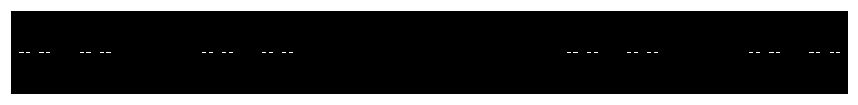

In [112]:
IMAGE_Q1_H = 100
IMAGE_Q1_W = 1000
MARGIN_Q1 = 10

###　問１描画関数
## <pram>
##     img : 描画先画像
##     generation : 描画する世代
##     x1 : 描画する線分の左端の点(x座標)
##     x2 : 描画する線分の右端の点(x座標)
def draw_q1(img, generation, x1, x2):
    if generation == 0:
        img = cv2.line(img, (x1, IMAGE_Q1_H//2), (x2, IMAGE_Q1_H//2), 255, thickness=1)
    else:
        sx1 = x1 + int((x2 - x1) / 3)
        sx2 = x2 - int((x2 - x1) / 3)
        img = draw_q1(img, generation - 1, x1, sx1)
        img = draw_q1(img, generation - 1, sx2, x2)
    return img


## 画像の作成
img_q1 = np.zeros((IMAGE_Q1_H, IMAGE_Q1_W), dtype=np.uint8)

## 描画：第二引数の数字を変更することで描画される世代が変わる。　
img_q1 = draw_q1(img_q1, 5, MARGIN_Q1, IMAGE_Q1_W - MARGIN_Q1)

## 表示
plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
plter.add_image(img_q1)
plter.show_plot()

### ● 問1 補足確認 (世代での変化)
各世代でどの様に変化していくかの確認をしてみよう

このnotebookファイルを置いているディレクトリに、`debug`というディレクトリを追加しておけば、そこにも出力されます。

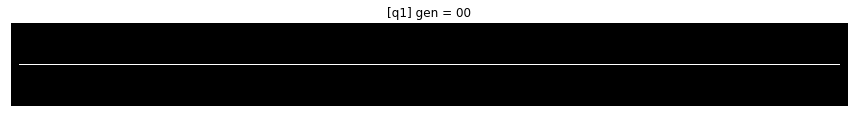

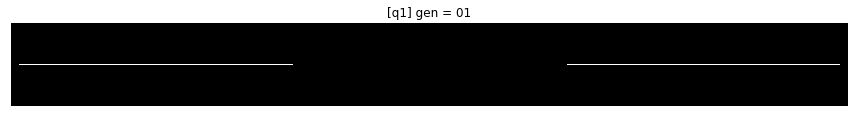

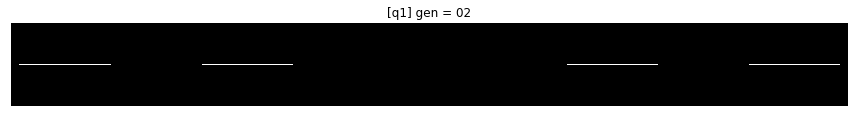

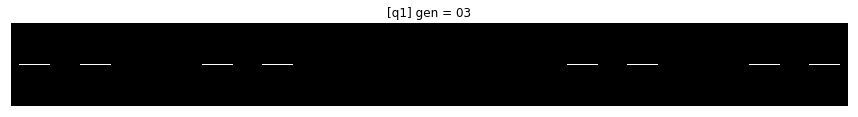

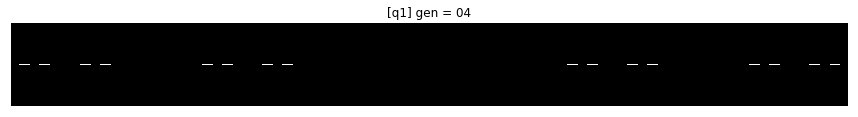

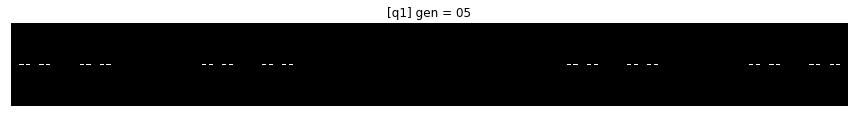

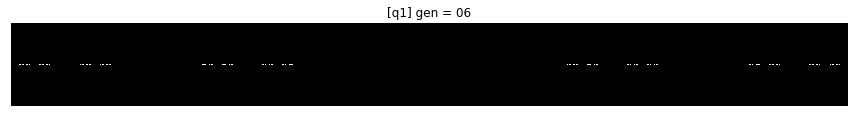

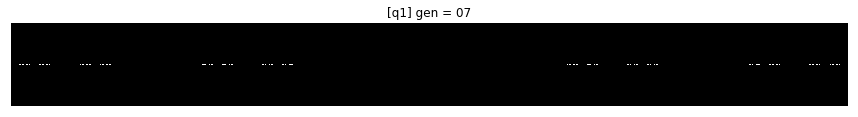

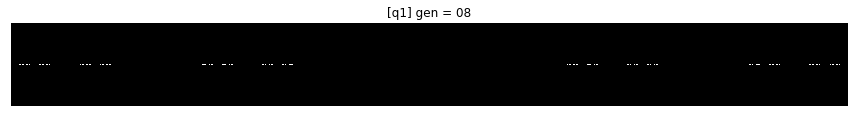

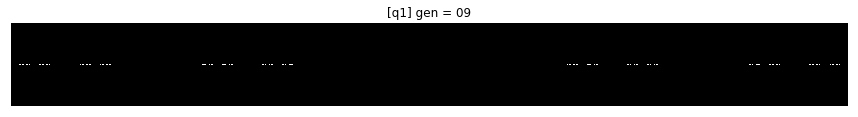

In [113]:
for gen in range(10):
    img_q1 = np.zeros((IMAGE_Q1_H, IMAGE_Q1_W), dtype=np.uint8)
    img_q1 = draw_q1(img_q1, gen, MARGIN_Q1, IMAGE_Q1_W - MARGIN_Q1)

    plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
    plter.add_image(img_q1, title='[q1] gen = %02d' % gen)
    plter.show_plot()
    cv2.imwrite(os.path.join('debug', 'Q1_gen_%02d.png' % gen), img_q1)

### ● 問1 補足確認 (収束の確認)
画像に書くという性質上、整数範囲しか取れず収束が早い。
どれくらいで収束してしまうか、すなわち、どれくらいで、3分の１にすることができなくなるか確認しよう。

In [93]:
n = 1000
i = 0
while(True):
    ns = int(n / 3)
    print('[%03d] : ' % i, ns)
    if ns <= 0:
        break
    n = ns
    i += 1

[000] :  333
[001] :  111
[002] :  37
[003] :  12
[004] :  4
[005] :  1
[006] :  0


## ◆ 問2
### 直線を３等分して、その1本の長さを持つ正三角形を真ん中に生やす操作を繰り返すフラクタル図形を描画せよ

下のセルの `# ここを記述`　部分にロジックを記述して完成させよう。

　<道具>
 - 三角関数
   - 60度のsin, cos
   
     `sin(radians(60))`
     
     `cos(radians(60))`
 

<ヒント>
- 問1の進化版と捉えると良い。
- 正三角形の１つの角は、60度


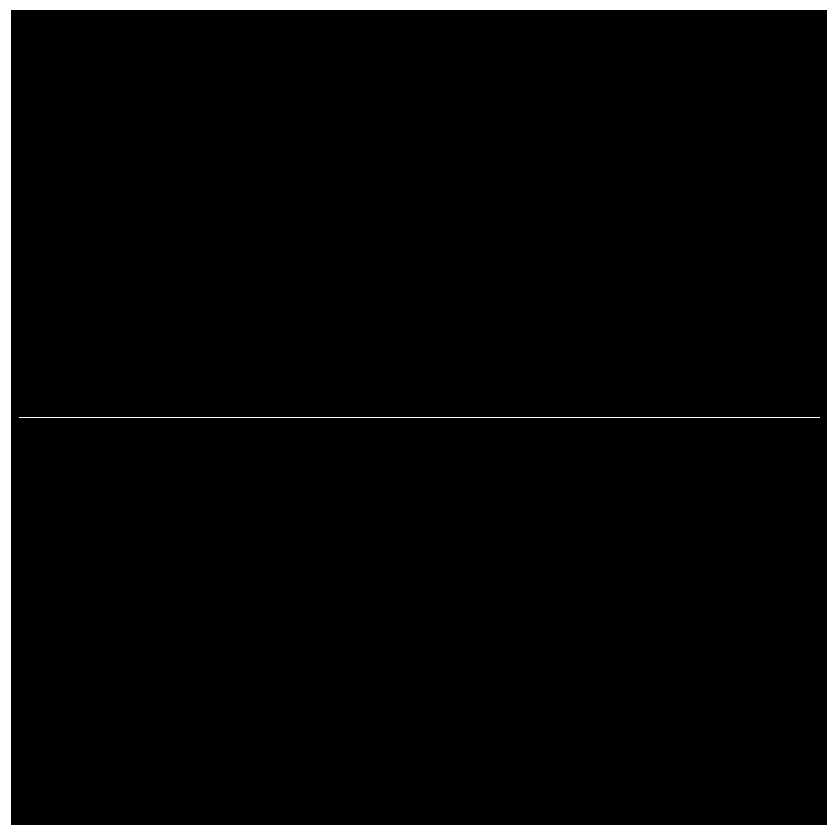

In [146]:
IMAGE_Q2_H = 1000
IMAGE_Q2_W = 1000
MARGIN_Q2 = 10

###　問2描画関数
## <pram>
##     img : 描画先画像
##     generation : 描画する世代
##     p1 : 描画する線分の左端の点(x座標, y座標)
##     p2 : 描画する線分の右端の点(x座標, y座標)
def draw_q2(img, generation, p1, p2):
    if generation == 0:
        img = cv2.line(img, p1, p2, 255, thickness=1)
    else:
        pa = (p1[0] + int((p2[0] - p1[0]) / 3), p1[1] + int((p2[1] - p1[1]) / 3))
        pb = (p2[0] - int((p2[0] - p1[0]) / 3), p2[1] - int((p2[1] - p1[1]) / 3))
        pc = (int((pa[0] - pb[0]) * cos(radians(60)) - (pa[1] - pb[1]) * sin(radians(60)) + pb[0])
                  , int((pa[0] - pb[0]) * sin(radians(60)) + (pa[1] - pb[1]) * cos(radians(60)) + pb[1]))
        img = draw_q2(img, generation - 1, p1, pa)
        img = draw_q2(img, generation - 1, pb, p2)
        img = draw_q2(img, generation - 1, pa, pc)
        img = draw_q2(img, generation - 1, pc, pb)
    return img


## 画像の作成
img_q2 = np.zeros((IMAGE_Q2_H, IMAGE_Q2_W), dtype=np.uint8)

## 描画：第二引数の数字を変更することで描画される世代が変わる。　
img_q2 = draw_q2(img_q2, 0, (MARGIN_Q2, IMAGE_Q2_H // 2), (IMAGE_Q2_W - MARGIN_Q2, IMAGE_Q2_H // 2))

## 表示
plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
plter.add_image(img_q2)
plter.show_plot()

### ● 問2 補足確認 (世代での変化)
各世代でどの様に変化していくかの確認をしてみよう

このnotebookファイルを置いているディレクトリに、`debug`というディレクトリを追加しておけば、そこにも出力されます。

注)genを大きくすると生成に非常に時間がかかります。12, 3あたりでかなり時間かかるようになるので。。。

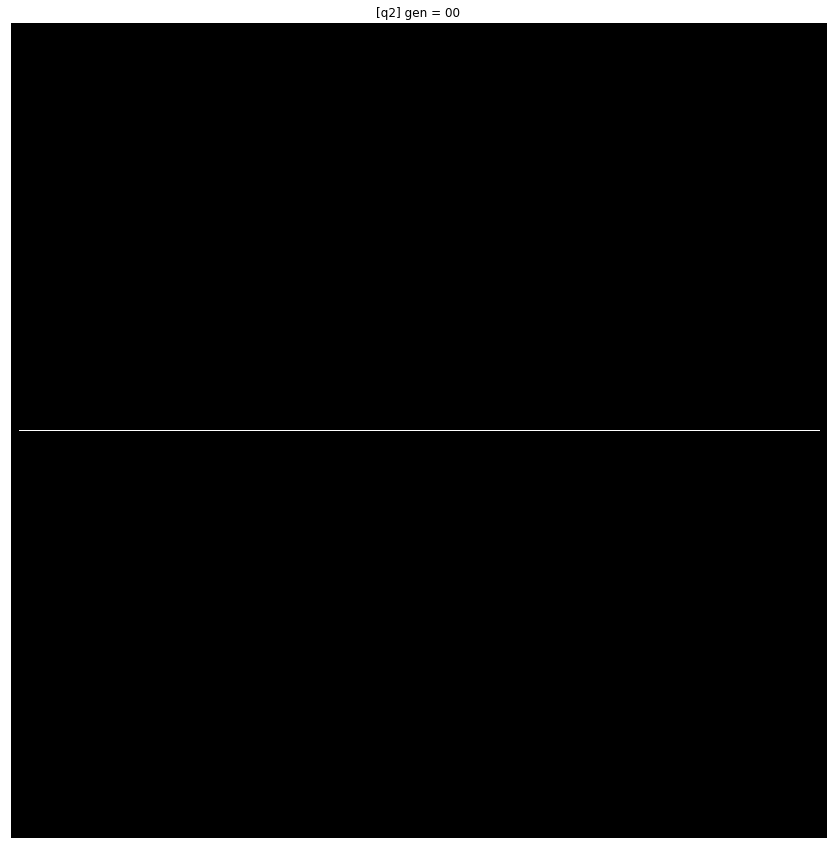

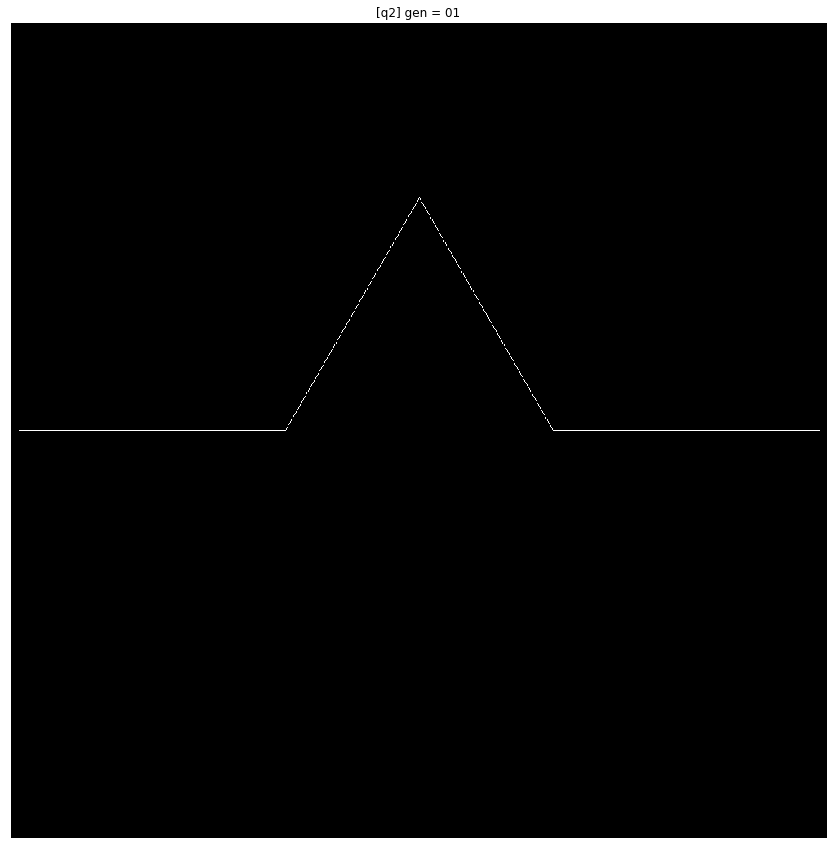

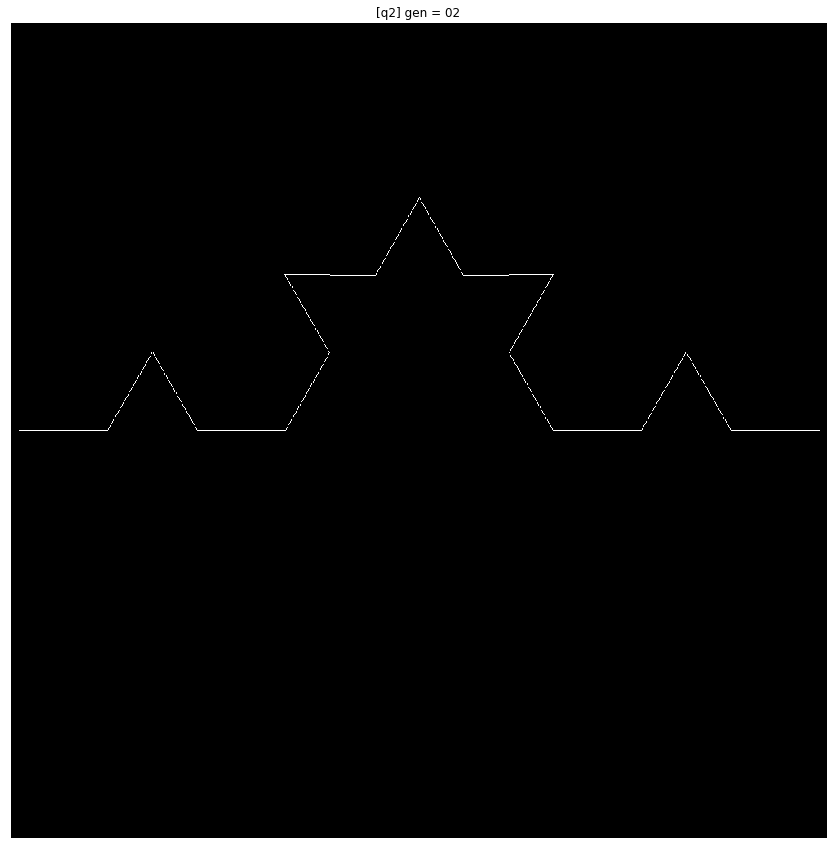

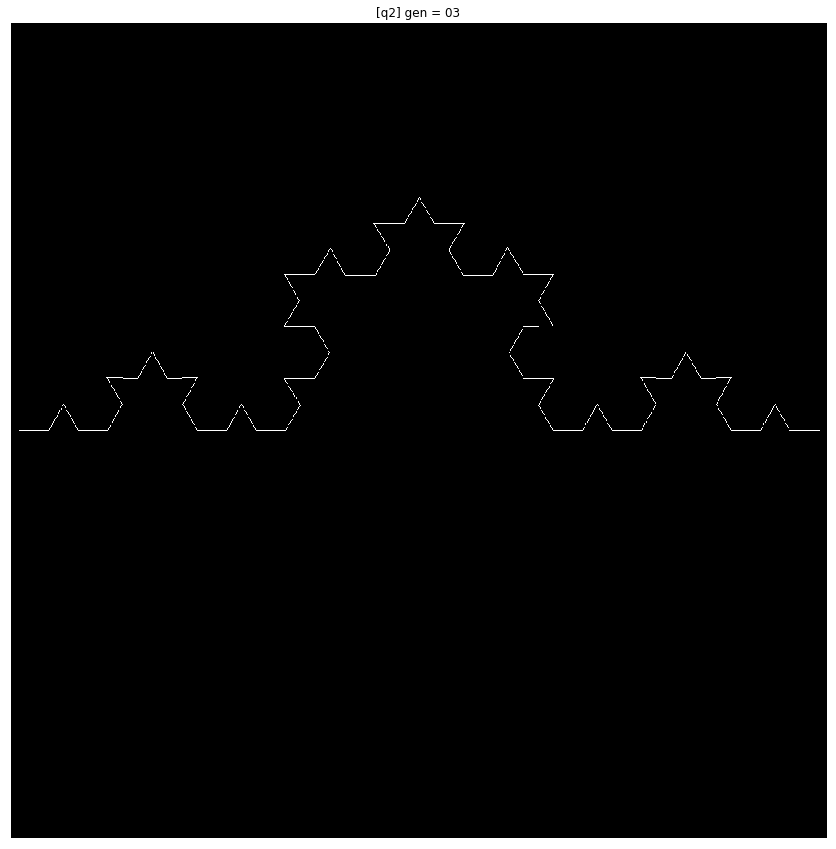

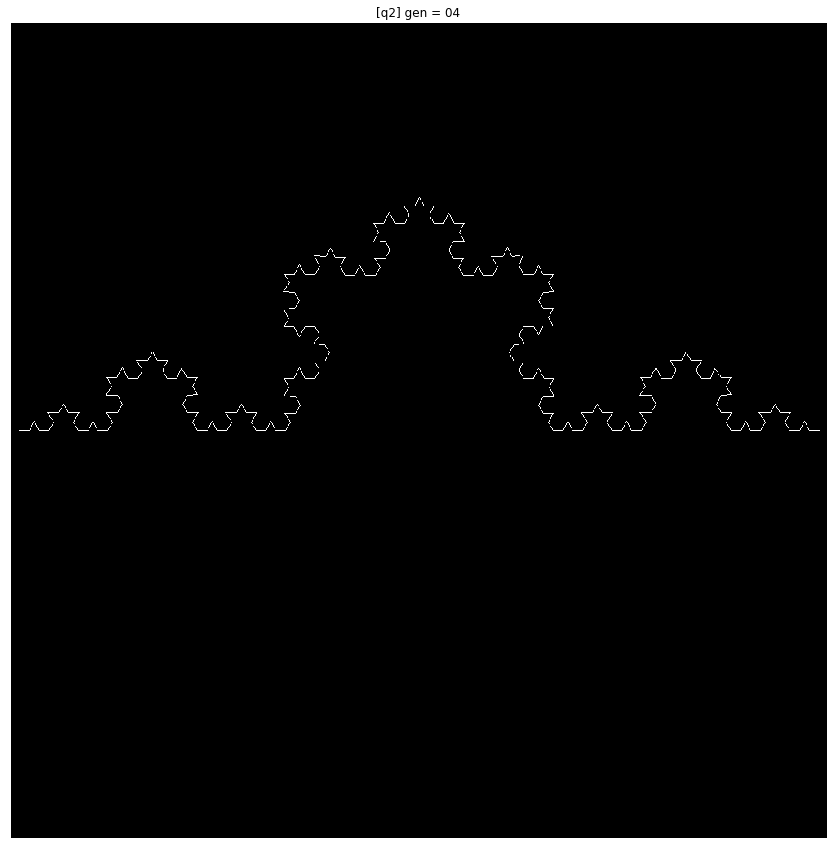

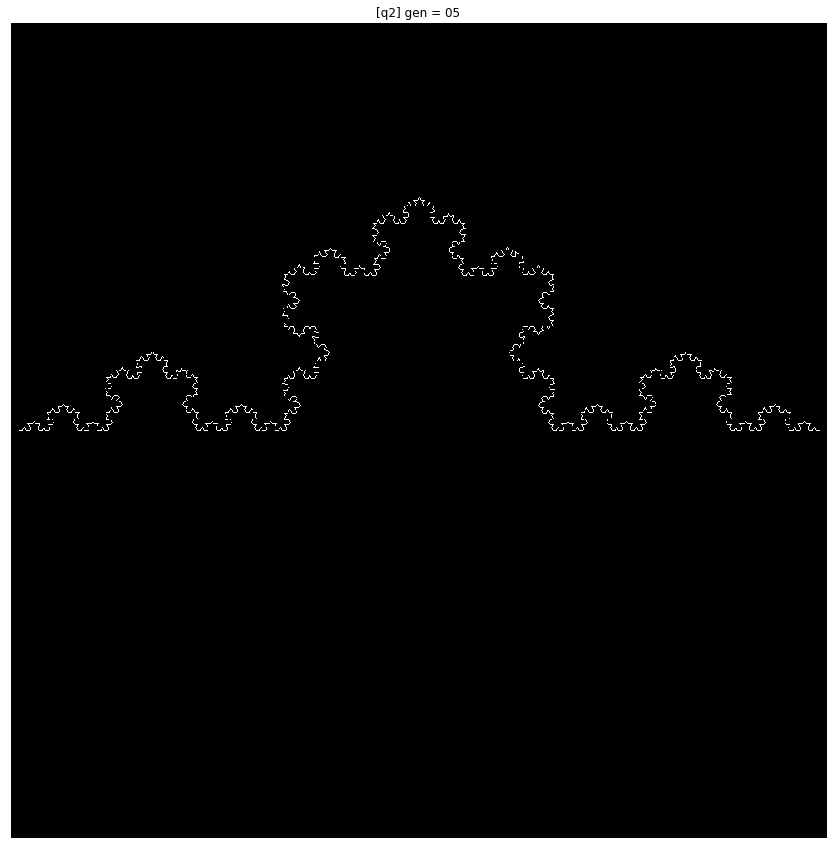

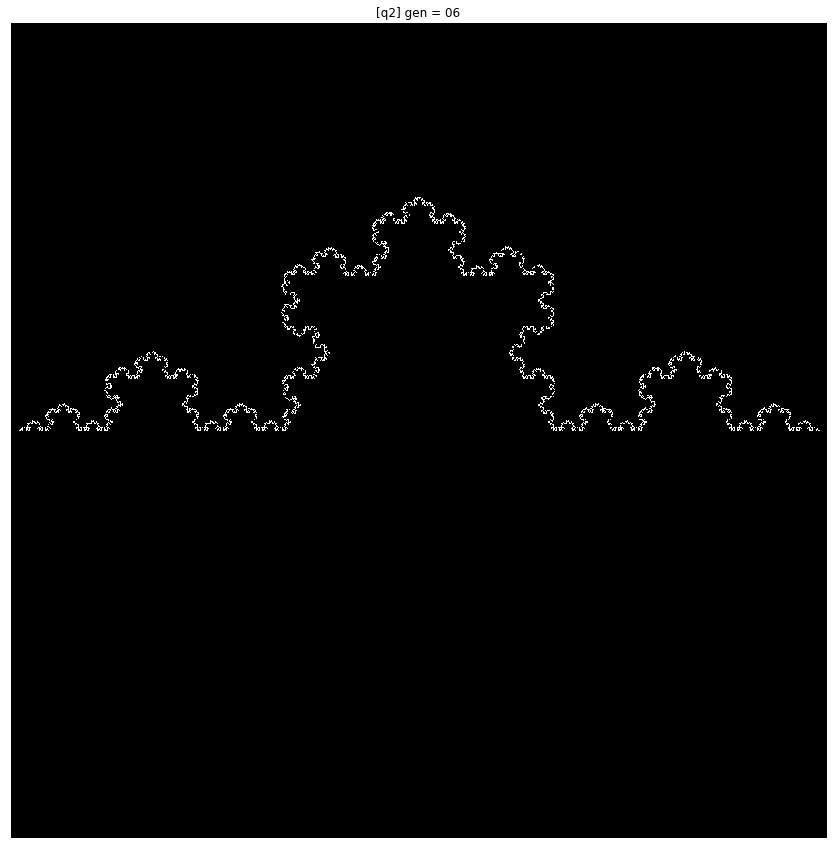

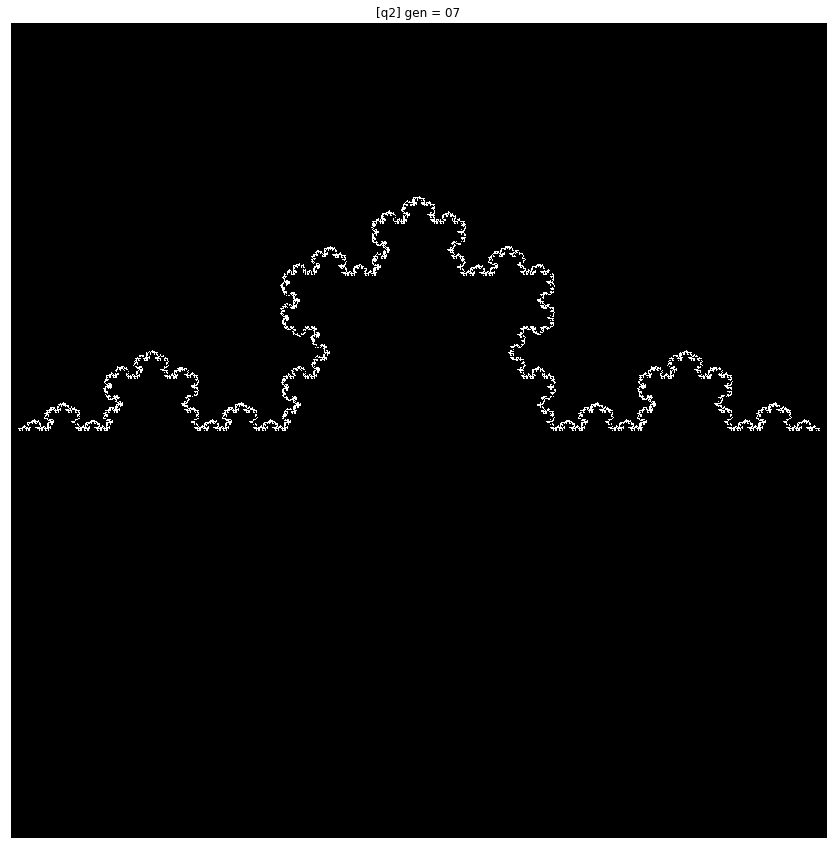

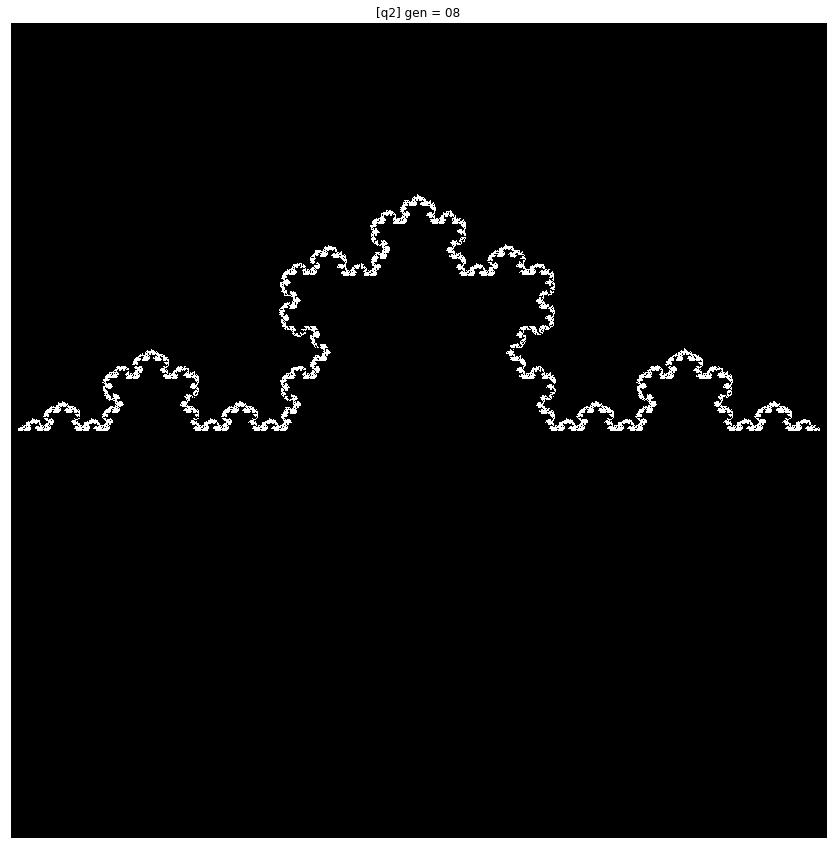

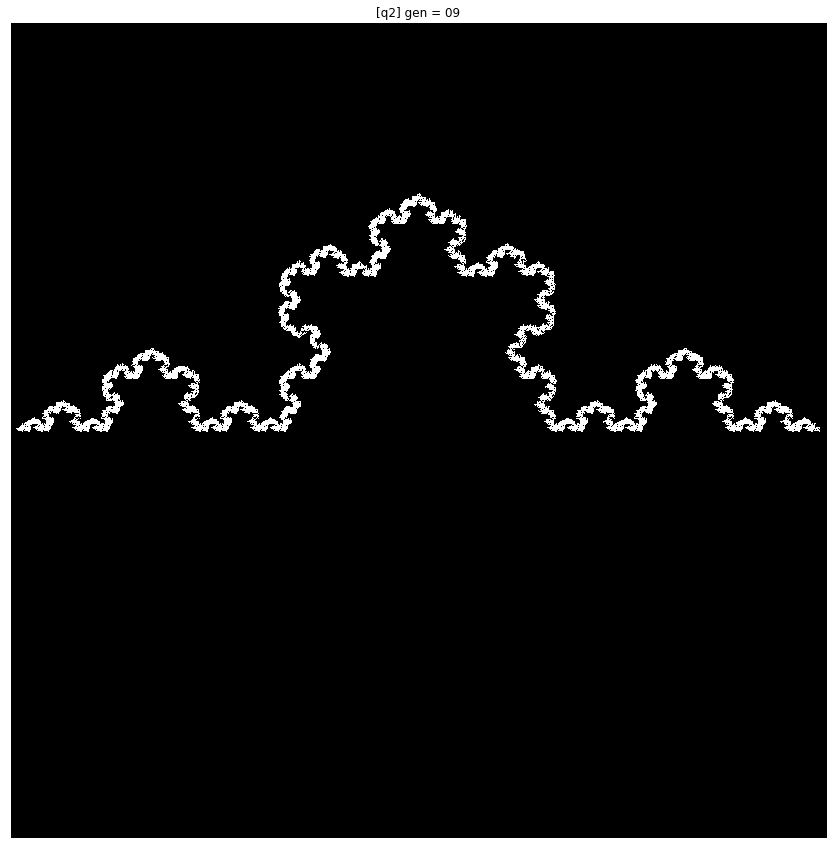

In [171]:
for gen in range(10):
    img_q2 = np.zeros((IMAGE_Q2_H, IMAGE_Q2_W), dtype=np.uint8)
    img_q2 = draw_q2(img_q2, gen, (MARGIN_Q2, IMAGE_Q2_H // 2), (IMAGE_Q2_W - MARGIN_Q2, IMAGE_Q2_H // 2))

    plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
    plter.add_image(img_q2, title='[q2] gen = %02d' % gen)
    plter.show_plot()
    cv2.imwrite(os.path.join('debug', 'Q2_gen_%02d.png' % gen), img_q2)

## ◆ 問3
### 問2のフラクタル図形を、スタートを正三角形にして描いてみよう。


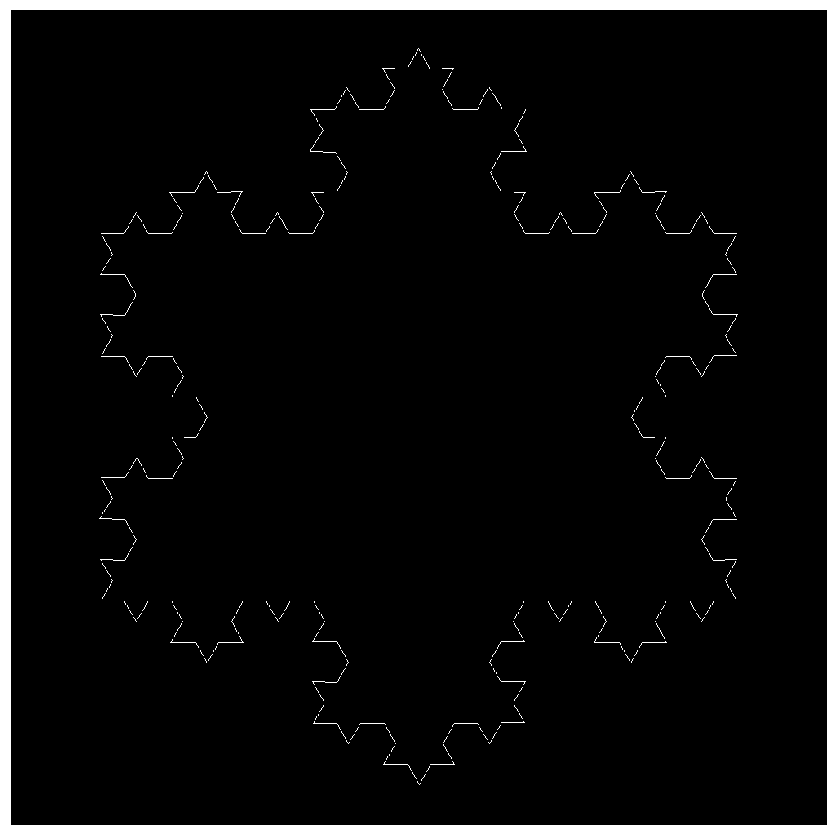

In [168]:
IMAGE_Q3_H = 1000
IMAGE_Q3_W = 1000

###　問3描画関数
## <pram>
##     img : 描画先画像
##     generation : 描画する世代
##     cp : 描画する正三角形の中心点(x座標, y座標)
##     size : 描画する正三角形の大きさ
def draw_q3(img, generation, cp, size):
    p1 = (cp[0], cp[1] + size)
    p2 = (int(cp[0] - (3 * size) / (2 * sqrt(3))), int(cp[1] - size / 2))
    p3 = (int(cp[0] + (3 * size) / (2 * sqrt(3))), int(cp[1] - size / 2))
    draw_q2(img, generation, p1, p2)
    draw_q2(img, generation, p2, p3)
    draw_q2(img, generation, p3, p1)
    return img
    

## 画像の作成
img_q3 = np.zeros((IMAGE_Q3_H, IMAGE_Q3_W), dtype=np.uint8)

## 描画：第二引数の数字を変更することで描画される世代が変わる。　
img_q3 = draw_q3(img_q3, 3, (IMAGE_Q3_W // 2, IMAGE_Q3_H // 2), 450)

## 表示
plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
plter.add_image(img_q3)
plter.show_plot()

### ● 問3 補足確認 (世代での変化)
各世代でどの様に変化していくかの確認をしてみよう

このnotebookファイルを置いているディレクトリに、`debug`というディレクトリを追加しておけば、そこにも出力されます。

注)genを大きくすると生成に非常に時間がかかります。12, 3あたりでかなり時間かかるようになるので。。。

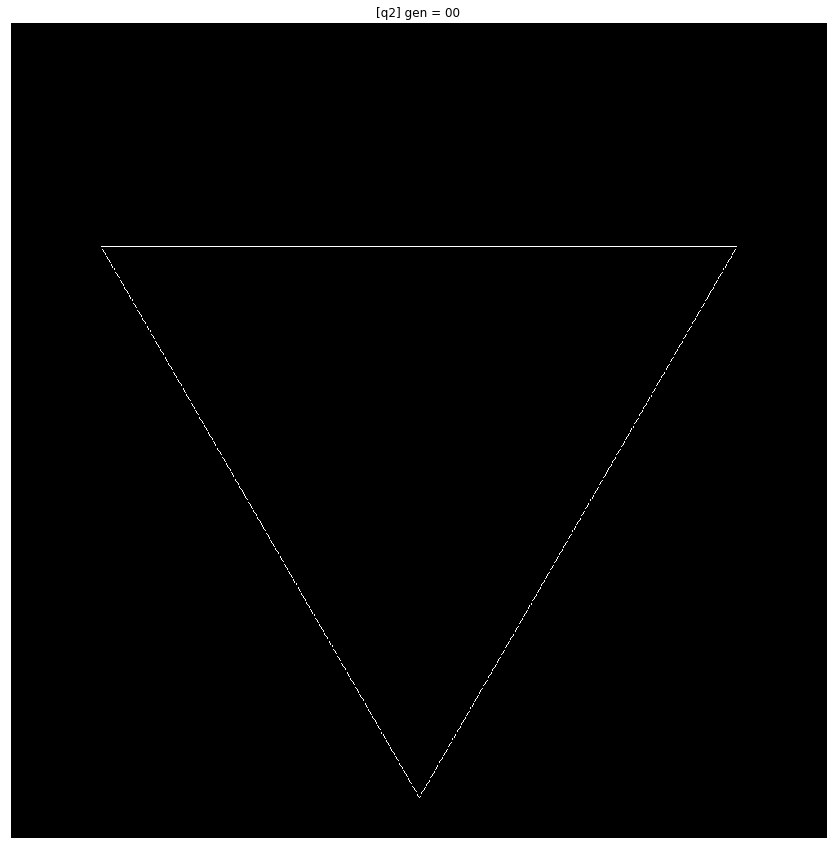

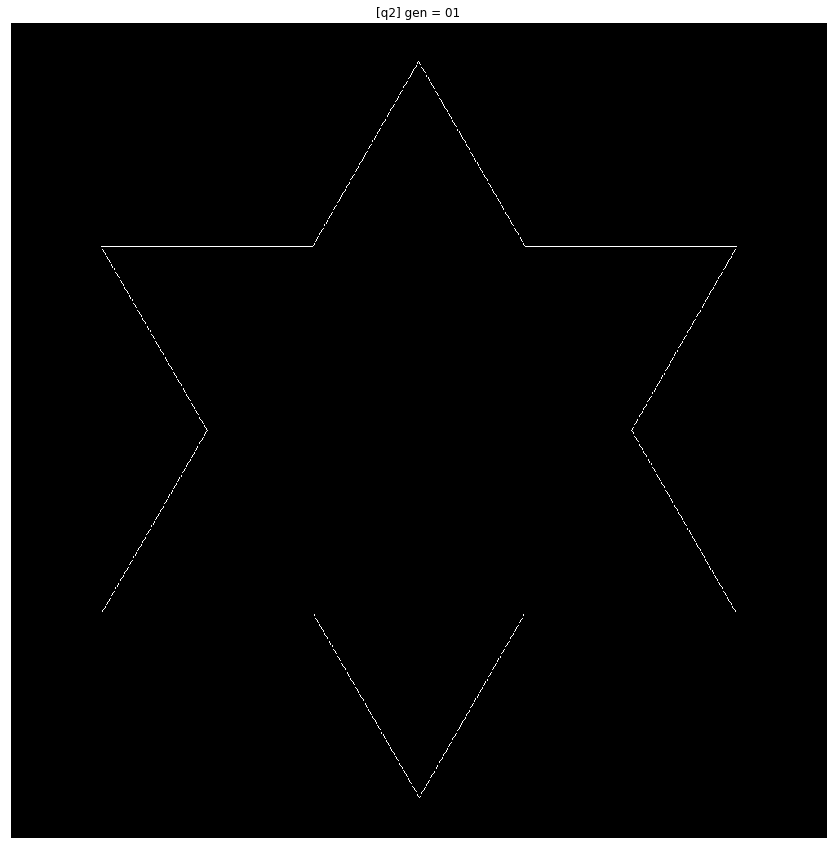

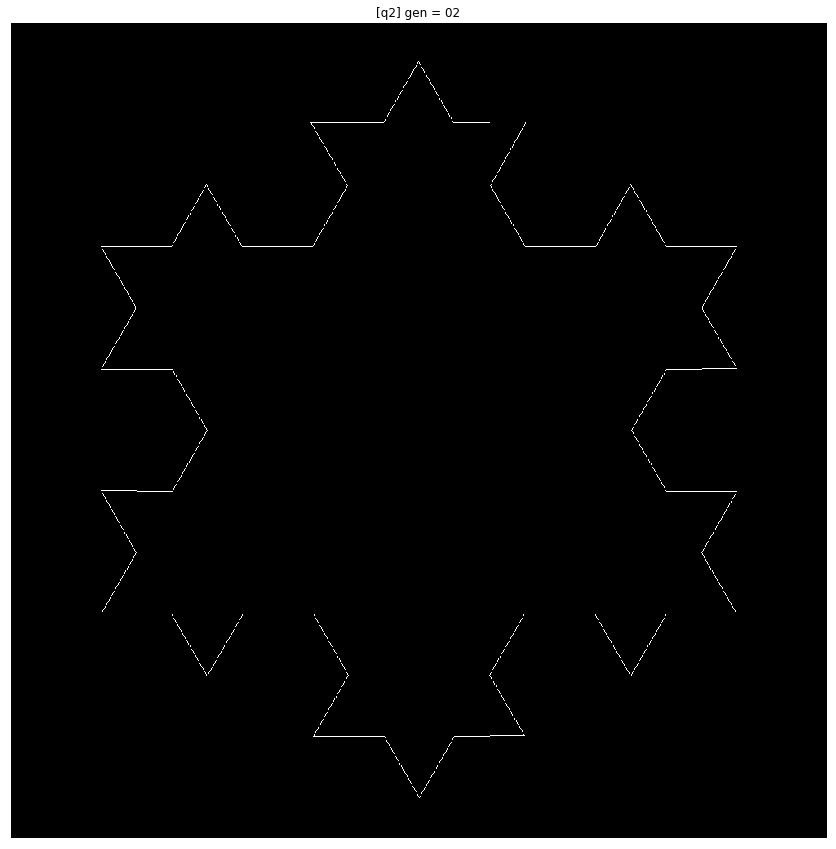

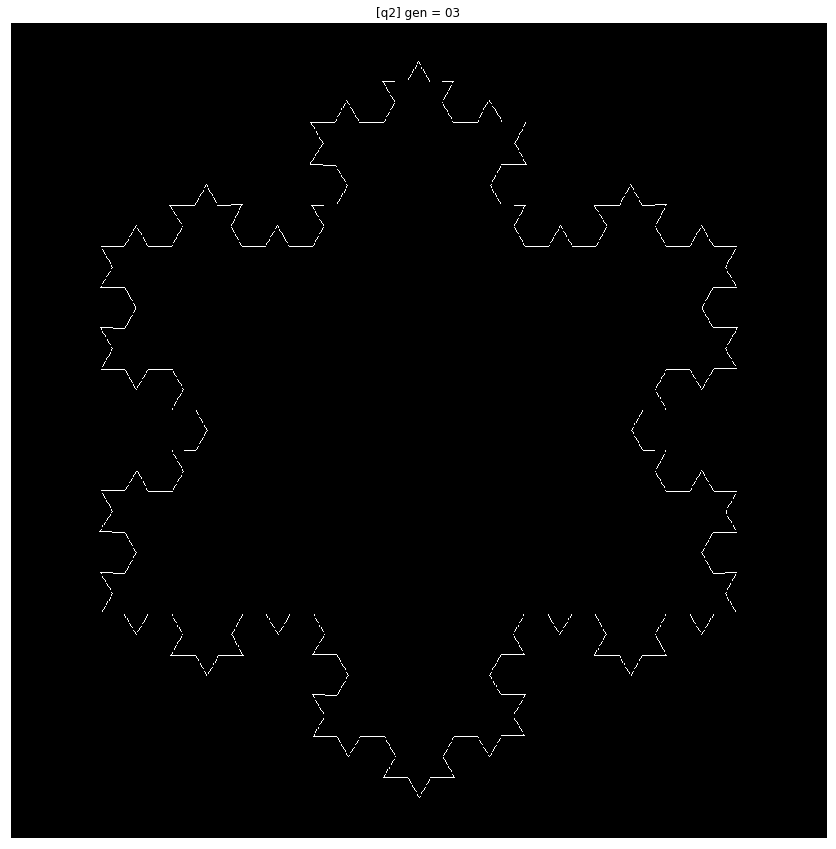

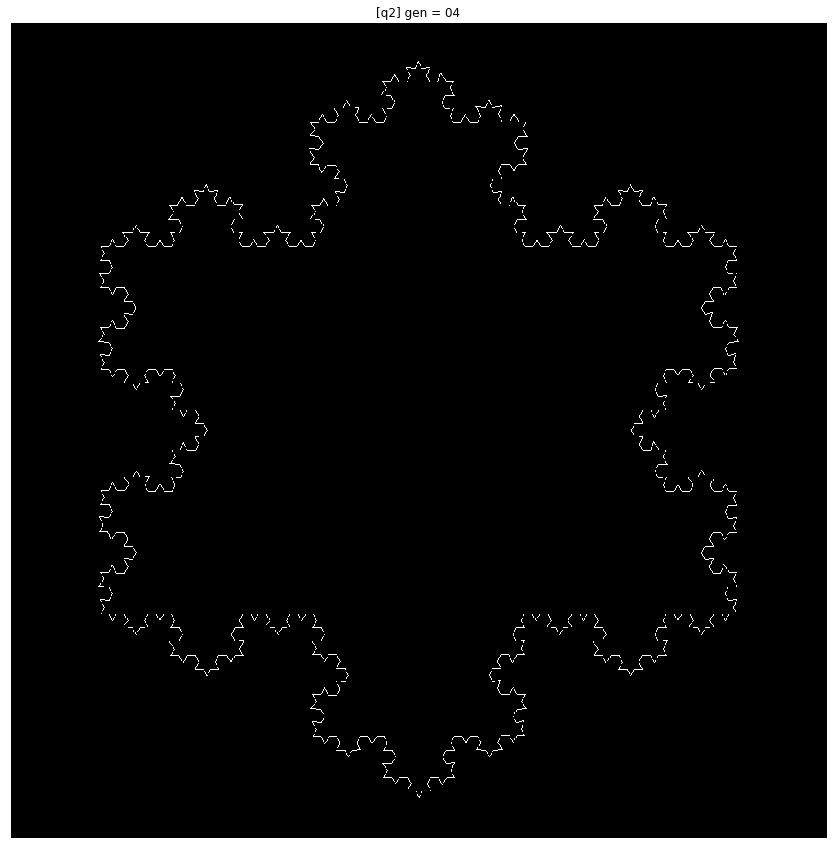

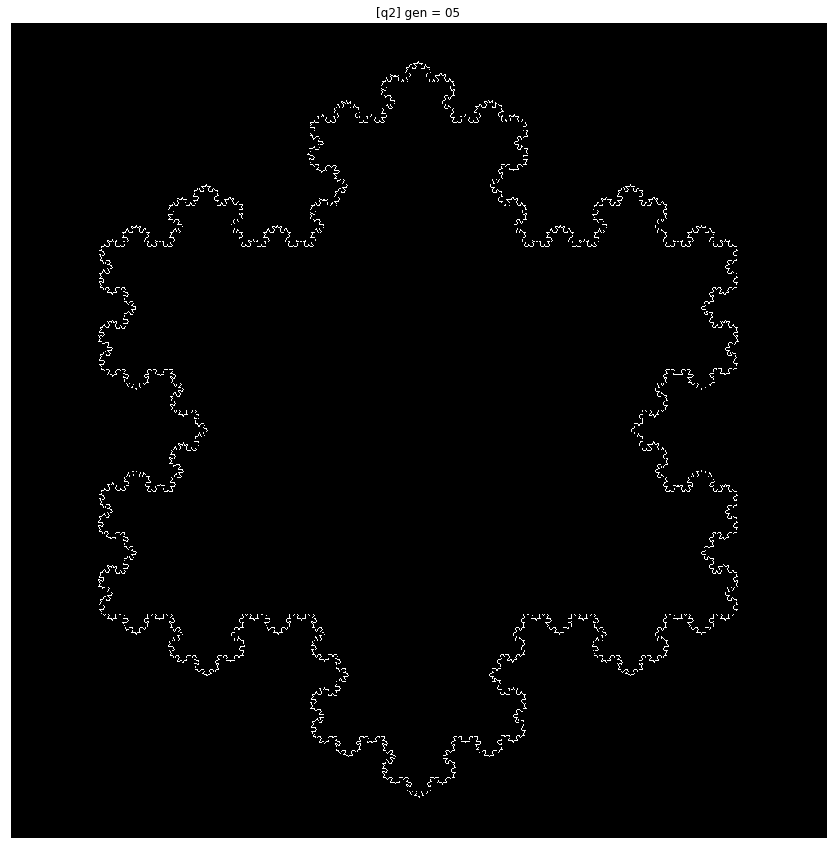

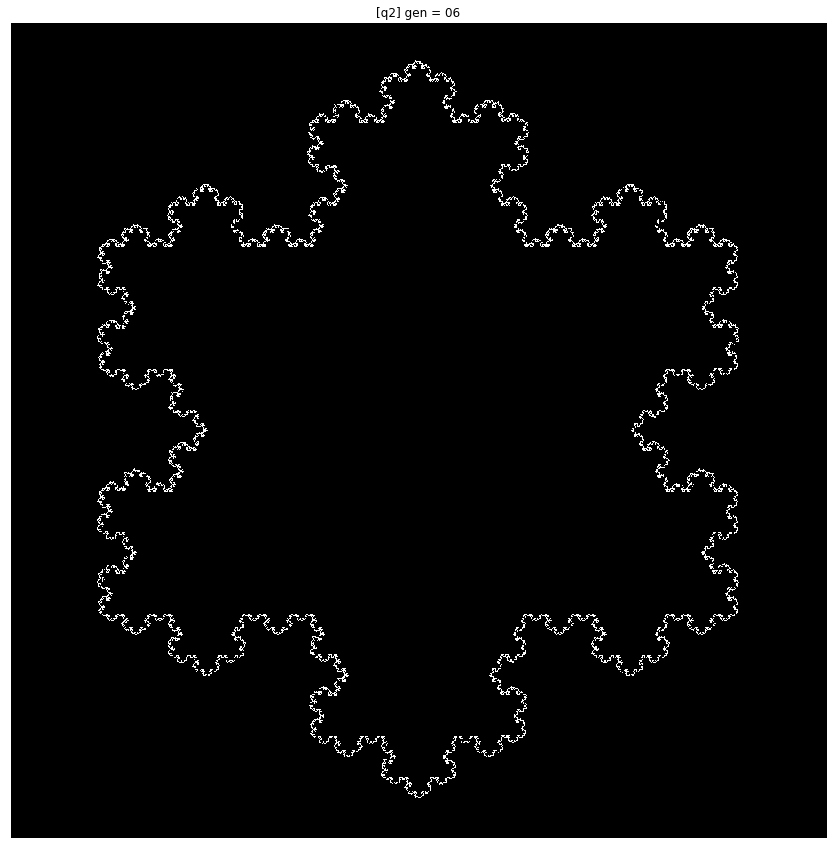

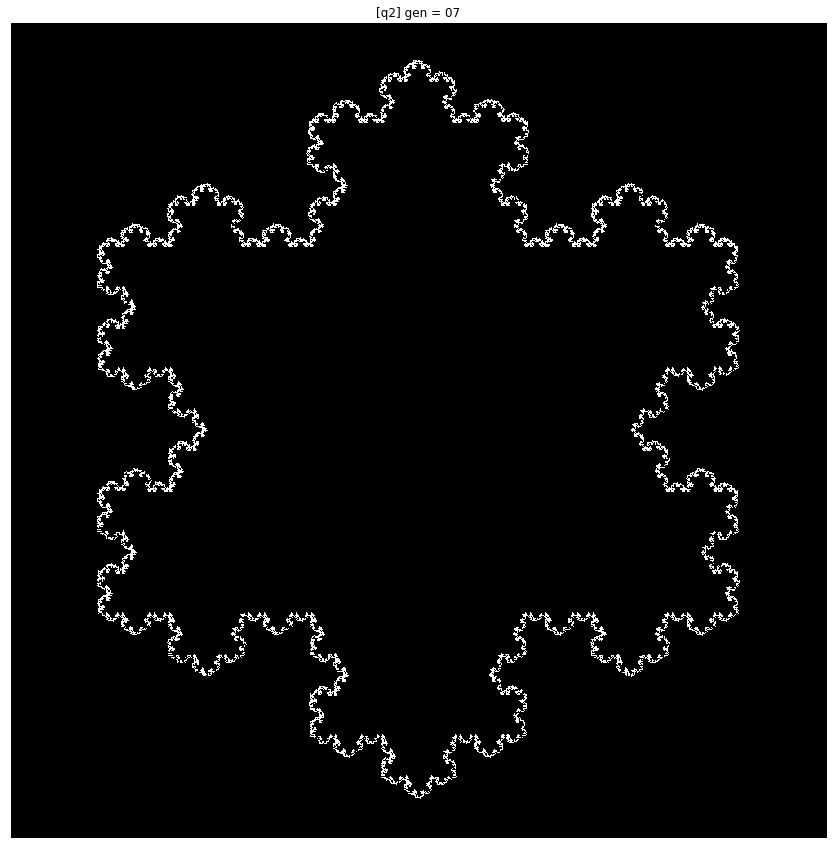

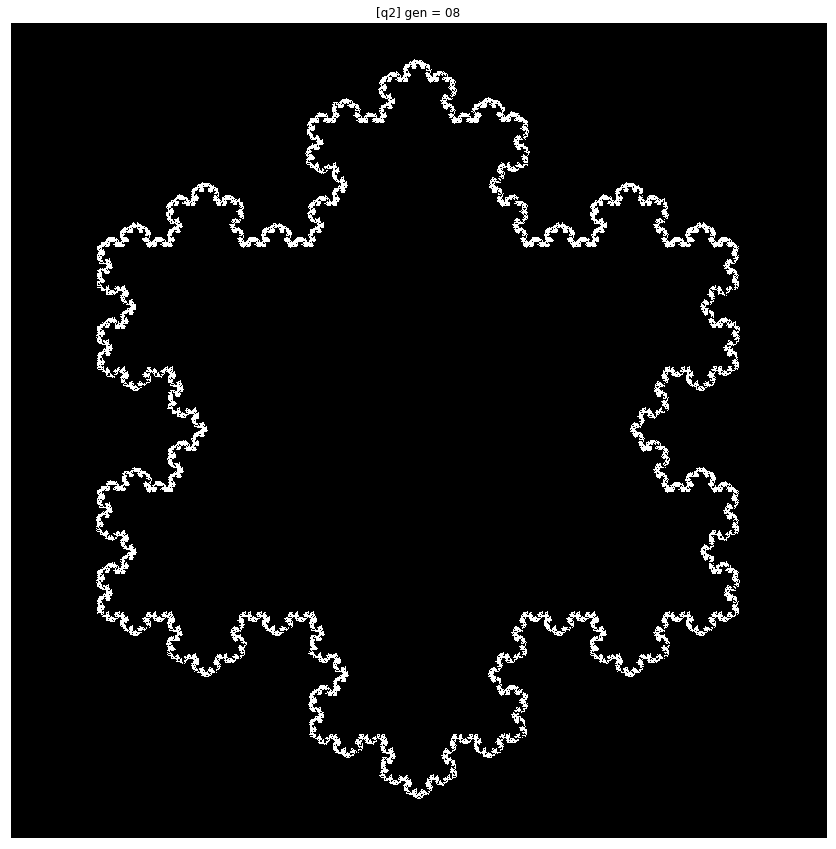

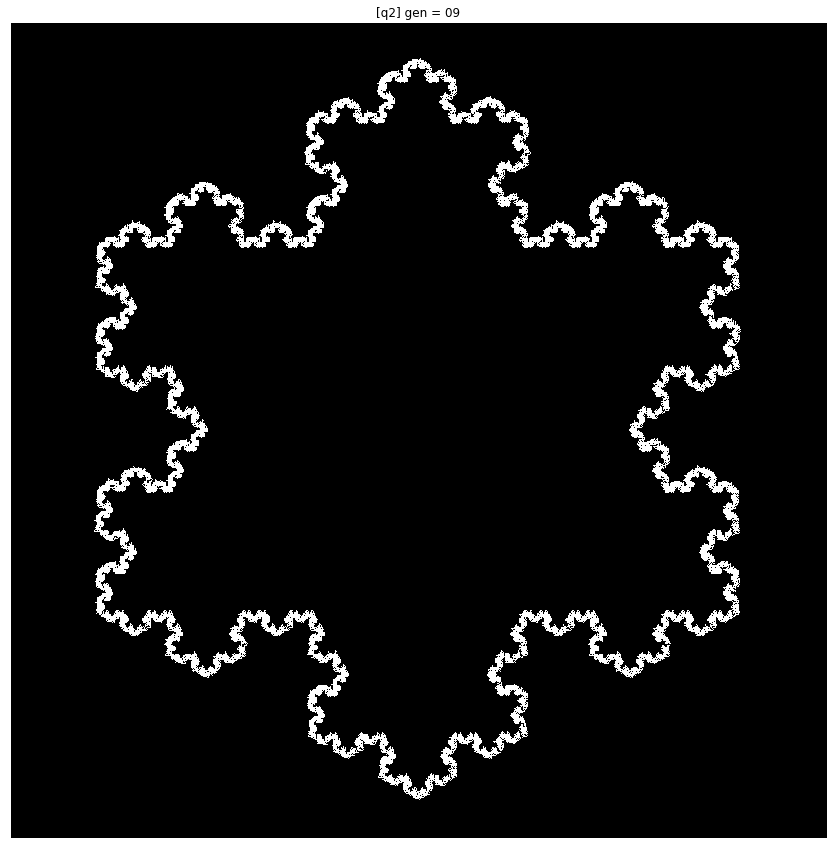

In [169]:
for gen in range(10):
    img_q3 = np.zeros((IMAGE_Q3_H, IMAGE_Q3_W), dtype=np.uint8)
    img_q3 = draw_q3(img_q3, gen, (IMAGE_Q3_W // 2, IMAGE_Q3_H // 2), 450)

    plter = ImageLinePlotter(0, plot_area_num=1, display_size=15)
    plter.add_image(img_q3, title='[q2] gen = %02d' % gen)
    plter.show_plot()
    cv2.imwrite(os.path.join('debug', 'Q3_gen_%02d.png' % gen), img_q3)